##### ECSE 415 Assignment 1
Matthew Lesko-Krleza
260692352

# 1. Filtering
## 1.1 Denoising
#### Questions 1-3

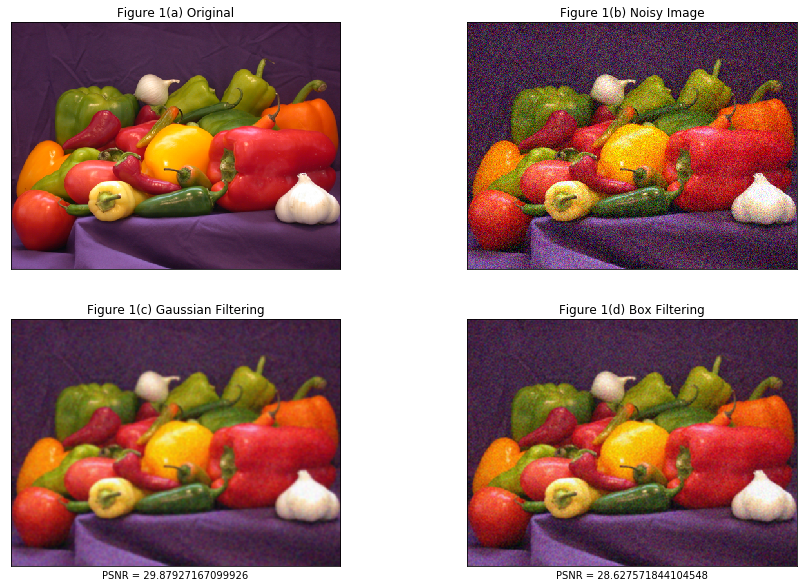

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path_1 = 'peppers.png'
img_path_2 = 'gaussian_noise_peppers.png'
img_path_3 = 'saltandpepper_noise_peppers.png'

img_original = cv2.imread(img_path_1)
img_noisy_gauss = cv2.imread(img_path_2)

img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_noisy_gauss = cv2.cvtColor(img_noisy_gauss, cv2.COLOR_BGR2RGB)

# Standard Deviation = sqrt(Variance)
res_gauss = cv2.GaussianBlur(src=img_noisy_gauss, 
                             ksize=(7,7), 
                             sigmaX=np.sqrt(2), 
                             sigmaY=np.sqrt(2))

res_box = cv2.blur(src=img_noisy_gauss, ksize=(3,3))

psnr_gauss = cv2.PSNR(img_original, res_gauss)
psnr_box = cv2.PSNR(img_original, res_box)

plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(221), plt.imshow(img_original), plt.title('Figure 1(a) Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_noisy_gauss), plt.title('Figure 1(b) Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(res_gauss), plt.title('Figure 1(c) Gaussian Filtering')
plt.xticks([]), plt.yticks([]), plt.xlabel(str.format("PSNR = {}", psnr_gauss))
plt.subplot(224), plt.imshow(res_box), plt.title('Figure 1(d) Box Filtering')
plt.xticks([]), plt.yticks([]), plt.xlabel(str.format("PSNR = {}", psnr_box))
plt.show()

As stated under *mathworks.com/help/vision/ref/psnr.html* The PSNR 'ratio is often used as a quality measurement between the original and a compressed image. __The higher the PSNR, the better the quality__ of the compressed, or reconstructed image.'

One can compare the PSNR of Figures 1(c) and 1(d) to note that *Figure 1(c)*, the *Gaussian Filtering* leads to a __higher PSNR__, thus a better quality of reconstruction. One can also see how Figure 1(c) ressembles more closely to Figure 1(a) than Figure 1(d) ressembling to Figure 1(a).

#### Questions 4-6

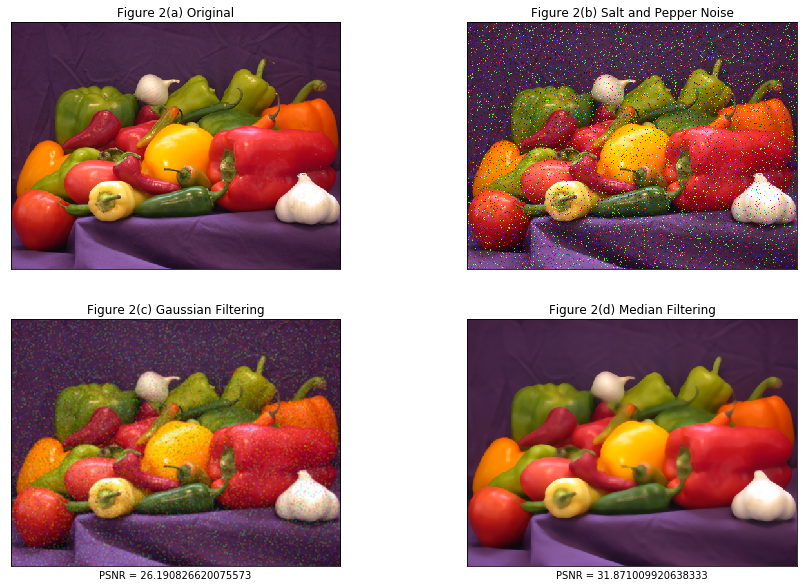

In [6]:
img_noisy_pepper = cv2.imread(img_path_3)
img_noisy_pepper = cv2.cvtColor(img_noisy_pepper, cv2.COLOR_BGR2RGB)

res_gauss = cv2.GaussianBlur(src=img_noisy_pepper, 
                             ksize=(3,3), 
                             sigmaX=np.sqrt(2), 
                             sigmaY=np.sqrt(2))
res_median = cv2.medianBlur(src=img_noisy_pepper, ksize=7)

psnr_gauss = cv2.PSNR(img_original, res_gauss)
psnr_median = cv2.PSNR(img_original, res_median)

plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(221), plt.imshow(img_original), plt.title('Figure 2(a) Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_noisy_pepper), plt.title('Figure 2(b) Salt and Pepper Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(res_gauss), plt.title('Figure 2(c) Gaussian Filtering')
plt.xticks([]), plt.yticks([]), plt.xlabel(str.format("PSNR = {}", psnr_gauss))
plt.subplot(224), plt.imshow(res_median), plt.title('Figure 2(d) Median Filtering')
plt.xticks([]), plt.yticks([]), plt.xlabel(str.format("PSNR = {}", psnr_median))
plt.show()

As one can see by comparing Figures 2(c) and 2(d), the *Median Filtering* results in a better reconstructed image. The __*PSNR* of *Figure 2(d)* is larger than that of *Figure 2(c)*.__ The PSNR of the *Median Filter* is of roughly 27.13 while as that of the *Gaussian Filtering* is of roughly 22.71. This proves that *Median Filtering* is more suitable for a *Salt and Pepper* noisy image reconstruction.